# Flow Chart:

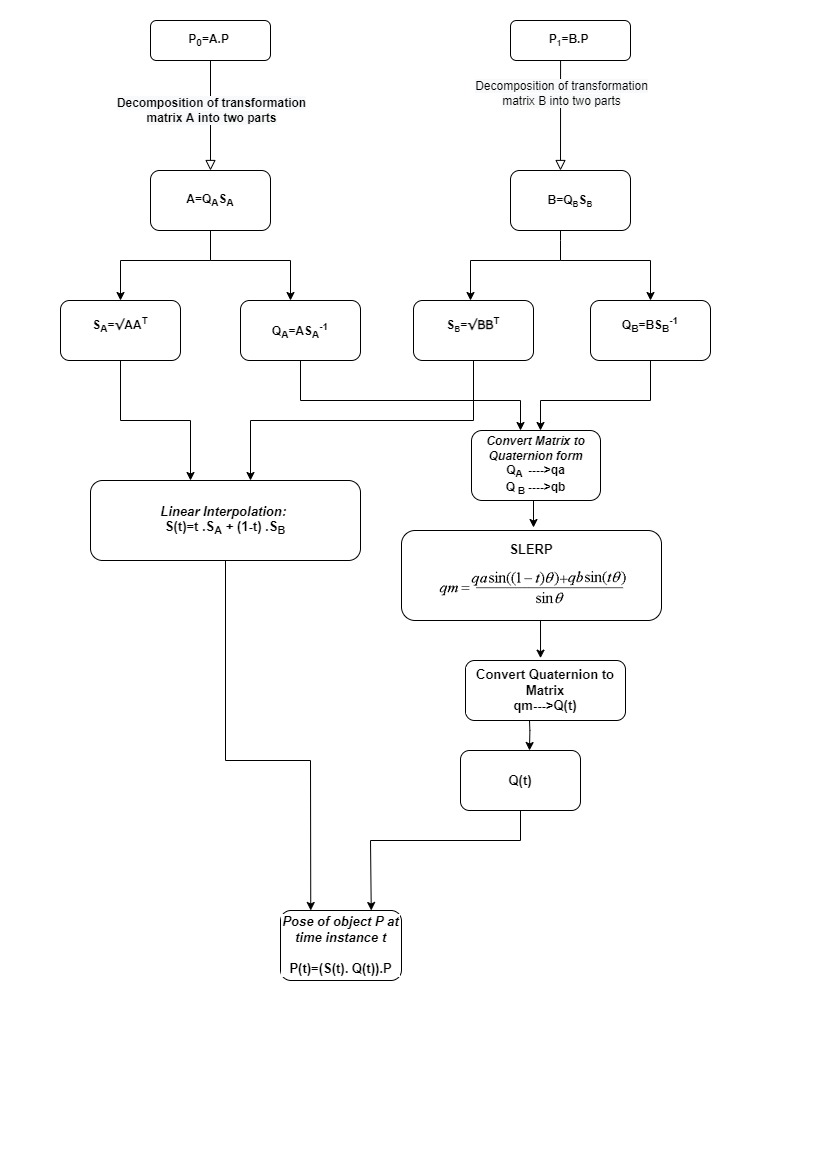

In [10]:
!pip install pyquaternion
!pip install splines

In [11]:
import numpy as np
from numpy.linalg import eig
from pyquaternion import Quaternion
import splines



lst=[x * 0.1 for x in range(0, 11)]
# I've added for loop to calculate all the pose of object from time t=0 to t=1
# if anyhow we can plot those poses in graph/animation then we can see movement of object from time t=0 to t=1  
for i in lst:
  t=i
  
  print("\n-------------------t=",t,"----------------------")
  p=np.array([[1,1,1,0],[1,0,1,0],[1,1,0,0],[0,0,0,0]])  #Suppose triangular point in 3d

  #Transformation matrix A (Initial transformation)
  A=np.array([[2,-14,5,0],[21,23,28,0],[13,18,40,0],[0,0,0,1]])
  AT = A.transpose()
  ATA = AT @ A

  #Transformation matrix B(Final transformation)
  B=np.array([[4,-14,1,0],[22,23,18,0],[15,10,20,0],[0,0,0,1]])
  BT = B.transpose()
  BTB= BT @ B

  # Steps to calculate SA and SB
  np.array(ATA)
  KA,EA=eig(ATA)
  KA=np.diag(KA)

  np.array(BTB)
  KB,EB=eig(BTB)
  KB=np.diag(KB)

  InvEA=np.linalg.inv(EA)
  InvEB=np.linalg.inv(EB)

  SQRTKA=np.sqrt(KA)
  SQRTKB=np.sqrt(KB)

  SA = EA @ SQRTKA @ InvEA
  SB = EB @ SQRTKB @ InvEB

  #Linear interpolation between SA and SB
  St=np.multiply(SA,t)+np.multiply(1-t,SB)
  #print("S(t):")
  #print(St)


  #Steps to calculate QA,QB
  InvSA=np.linalg.inv(SA)
  InvSB=np.linalg.inv(SB)

  QA = A @ InvSA
  QB = B @ InvSB

  # Conversion of matrix QA QB to quaternion form qa,qb
  qa=Quaternion(matrix=QA)
  qb=Quaternion(matrix=QB)
  #Applying slerp interpolation
  qm  = Quaternion.slerp(qa, qb, t)
  #Conversion of quaternion form qm to matrix Q(t)
  Qt = qm.transformation_matrix
  #print("Q(t):")
  #print(Qt)

  # T is the interpolated Transformation matrix at time t
  T = St @ Qt
  #print("Pt=Q(t)*S(t)")
  #print(T)

  #pt gives pose of the object p at time instant t
  pt=T @ p
  #print(p)
  print(pt)





-------------------t= 0.0 ----------------------
[[24.22262296 34.17898093  2.56314522  0.        ]
 [43.87866135 39.52831273 27.63804819  0.        ]
 [29.58669912 34.13945291  4.72206053  0.        ]
 [ 0.          0.          0.          0.        ]]

-------------------t= 0.1 ----------------------
[[24.56282088 34.26035483  3.47368941  0.        ]
 [44.5522874  39.86768551 28.29982834  0.        ]
 [32.77845151 36.95856636  5.93605941  0.        ]
 [ 0.          0.          0.          0.        ]]

-------------------t= 0.2 ----------------------
[[24.89125141 34.30998567  4.37392581  0.        ]
 [45.2292643  40.21610606 28.96449768  0.        ]
 [36.0072152  39.8749249   7.19621618  0.        ]
 [ 0.          0.          0.          0.        ]]

-------------------t= 0.30000000000000004 ----------------------
[[25.20834613 34.32929302  5.26288039  0.        ]
 [45.90945655 40.57301912 29.63294221  0.        ]
 [39.27171548 42.88387047  8.50787077  0.        ]
 [ 0.          0

In [18]:
print(qa,qb)

0.831 +0.016i +0.170j +0.529k 0.894 +0.000i -0.000j +0.447k


In [12]:
import math

def quaternion_to_euler_angle(w, x, y, z):
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = math.degrees(math.atan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.degrees(math.asin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = math.degrees(math.atan2(t3, t4))

    return X, Y, Z

In [19]:
from helper import angles2quat, animate_rotations, display_animation
def slerp(one, two, t):
    return (two * one.inverse())**t * one

x1,y1,z1 = quaternion_to_euler_angle(0.831 ,0.016, 0.170 ,0.529) 
x2,y2,z2 = quaternion_to_euler_angle(0.894 ,0.000 ,0.000 ,0.447) 
q1 = angles2quat(x1,y1,z1)
q2 = angles2quat(x2,y2,z2)
np.degrees(np.arccos(q1.dot(q2)) * 2)
ani_times = np.linspace(0, 1, 50)
ani = animate_rotations({
    'slerp(q1, q2)': slerp(q1, q2, ani_times),
    'slerp(q1, -q2)': slerp(q1, -q2, ani_times),
}, figsize=(5, 2))
display_animation(ani, default_mode='reflect')


Animations can only be shown in HTML output, sorry!

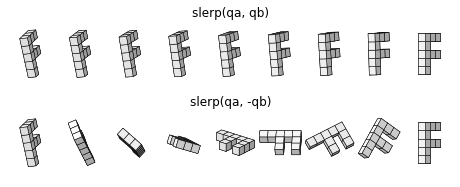

Animations can only be shown in HTML output, sorry!

In [23]:
from helper import plot_rotations
def slerp(one, two, t):
    return (two * one.inverse())**t * one
x1,y1,z1 = quaternion_to_euler_angle(0.831 ,0.016, 0.170 ,0.529) 
x2,y2,z2 = quaternion_to_euler_angle(0.894 ,0.000 ,0.000 ,0.447)
qa = angles2quat(x1,y1,z1)
qb = angles2quat(x2,y2,z2)
np.degrees(np.arccos(qa.dot(qb)) * 2)

plot_times = np.linspace(0, 1, 9)

plot_rotations({
    'slerp(qa, qb)': slerp(qa, qb, plot_times),
    'slerp(qa, -qb)': slerp(qa, -qb, plot_times),
}, figsize=(8, 3))
display_animation(ani, default_mode='reflect')